Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

Pre-process the data

In [2]:
(X_train,y_train),(X_test,y_test)=mnist.load_data() # NumPy array
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
def plot(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.show()

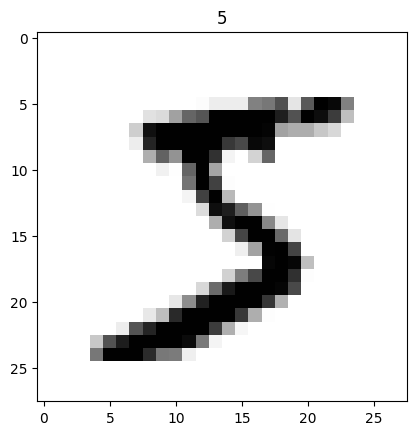

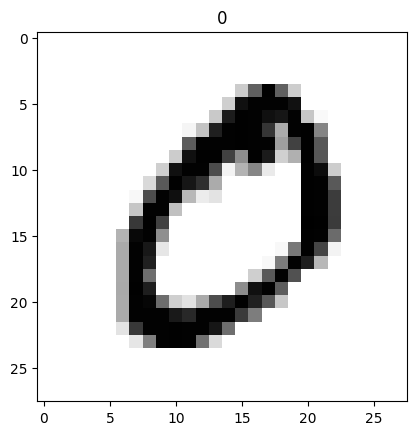

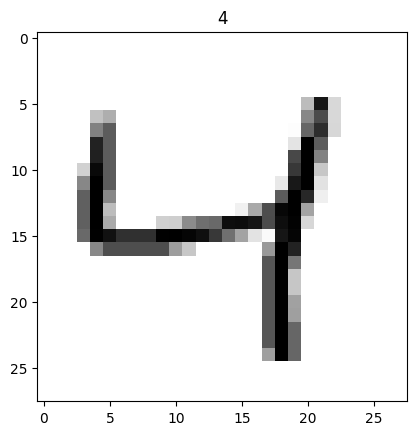

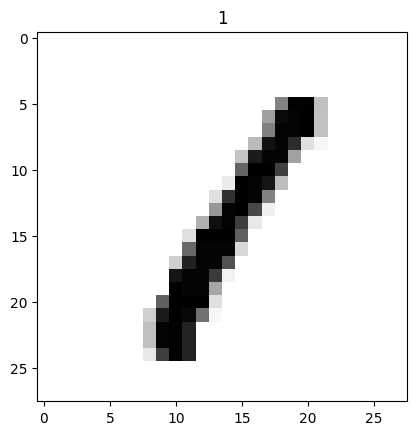

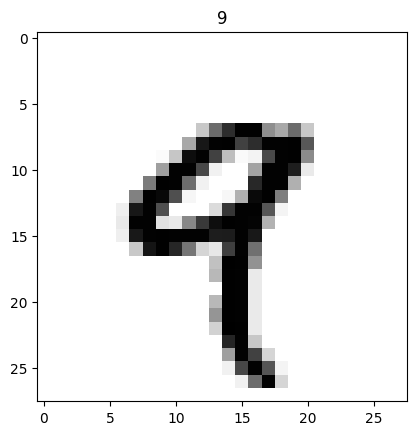

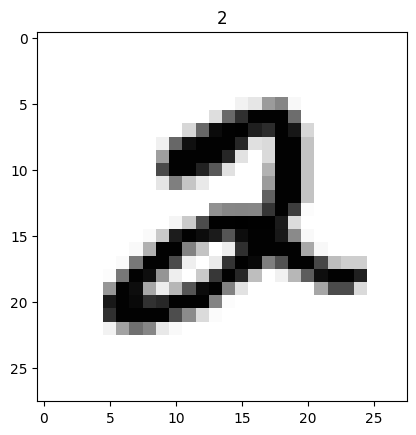

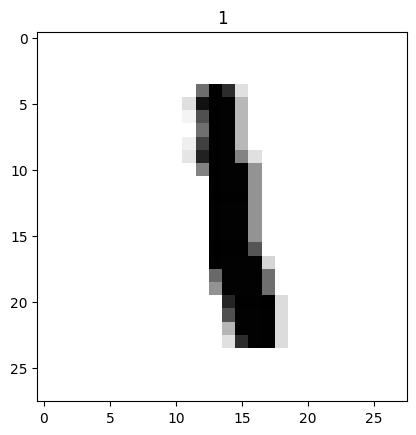

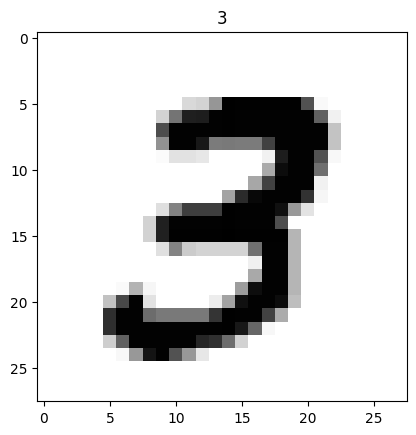

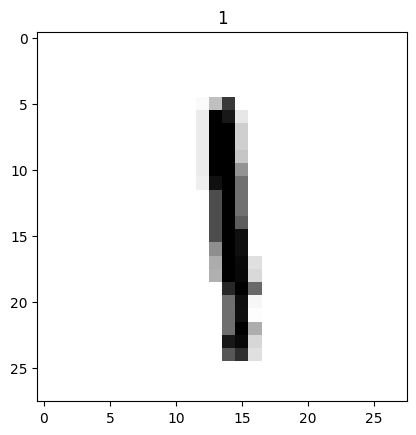

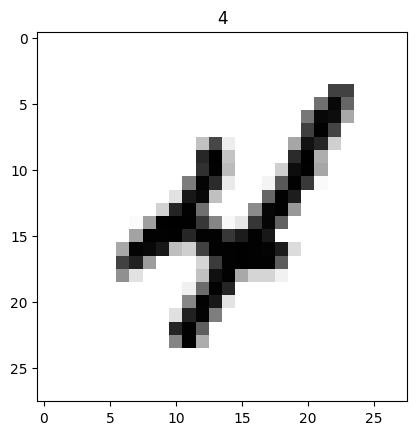

In [4]:
for i in range(10):
    plot(i)

In [5]:
# Normalizing the image, to [0,1] range by dividing by 255 as 0 to 255 intensity
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

# Expanding dimensions of images to (28,28,1) as 3 dimensions are expected and -1 is the last index adding 'channel' aspect to b&w images too
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

# Integer class labels are converted to one-hot vector / binary vectors
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

Model building

In [7]:
# Sequential model with layers
model=Sequential()

# Adding CNN
model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D((2,2)))

# Once again but no need of input shape again
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

# 2D to 1D
model.add(Flatten())

# Drops out some values
model.add(Dropout(0.25))

# Dense layer to convert them to values such that when added, comes out to be one
model.add(Dense(10,activation="softmax"))

c:\Users\swapn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compiling by using adam algorithm along with crossentropy for digit recognition and metric of accuracy
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [10]:
# Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Earlystopping to stop when no improvements seen, to optimize training time
es=EarlyStopping(monitor='val_acc',min_delta=0.01,patience=4,verbose=1)

# ModelCheckpoint saves weights, so that later on it can be used to evaluate the best model
mc=ModelCheckpoint("./bestmodel.keras",monitor="val_acc",verbose=1,save_best_only=True)

# In the above es and mc, verbose is basically used to display the message and val_acc is validation accuracy.When save_best_only is True, it overwrites the previously written "best model"

cb=[es,mc]

Training

In [13]:
# Fit() is used to train the model, here using X_train and y_train along with 50 epochs and 30% of the training data used for validation
his=model.fit(X_train,y_train,epochs=50,validation_split=0.3)

# Finally, trained model is saved in dr.keras
model.save("dr.keras")

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8539 - loss: 0.4711 - val_accuracy: 0.9743 - val_loss: 0.0848
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9758 - loss: 0.0778 - val_accuracy: 0.9829 - val_loss: 0.0563
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9826 - loss: 0.0541 - val_accuracy: 0.9840 - val_loss: 0.0511
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9857 - loss: 0.0430 - val_accuracy: 0.9856 - val_loss: 0.0460
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9883 - loss: 0.0363 - val_accuracy: 0.9876 - val_loss: 0.0413
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9907 - loss: 0.0300 - val_accuracy: 0.9883 - val_loss: 0.0410
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9907 - loss: 0.0300 - val_accuracy: 0.9887 - val_loss: 0.0397
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9915 - loss

In [14]:
# Load model
model_S=keras.models.load_model("C://Users//swapn//Downloads//Handwritten Digit Recognition//dr.keras")

In [16]:
# To display the score
score=model_S.evaluate(X_test,y_test)
print(f"Model accuracy is {score[1]} and loss is {score[0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9871 - loss: 0.0628
Model accuracy is 0.9897000193595886 and loss is 0.05008746683597565
